<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/simple_lm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://github.com/pytorch/pytorch/issues/107960
!ldconfig -p | grep libcuda

	libcudart.so.12 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libcudart.so.12
	libcudart.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libcudart.so


In [2]:
!find /usr -name 'libcuda.so'

/usr/local/cuda-12.2/targets/x86_64-linux/lib/stubs/libcuda.so
/usr/local/cuda-12.2/compat/libcuda.so
/usr/lib64-nvidia/libcuda.so


In [17]:
!ldconfig /usr/lib64-nvidia

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link



In [ ]:
!git clone https://github.com/antirez/simple-language-model.git

Cloning into 'simple-language-model'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 26 (delta 9), reused 26 (delta 9), pack-reused 0
Receiving objects: 100% (26/26), 19.52 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
%cd simple-language-model

/content/simple-language-model


In [ ]:
!python nn.py datasets/

# gpt

In [6]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.8 MB/s eta 0:00:00


In [14]:
from transformers import AutoModelForCausalLM
from transformers import GPT2LMHeadModel
from torch import nn

def print_hf_gpt2_model(model_path):
    hf_model = GPT2LMHeadModel.from_pretrained(model_path)
    print(hf_model)
    hf_dict = hf_model.state_dict()
    print(hf_model.config)
    #print(hf_dict.keys())

    # embedding
    #print(f"wte.weight => {hf_dict['wte.weight'].shape}")

    # final classifier
    #print(f"lm_head.weight => {hf_dict['lm_head.weight'].shape}")

In [16]:
model_path = "openai-gpt"
print_hf_gpt2_model(model_path)


config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

You are using a model of type openai-gpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['wte.weight', 'wpe.weight', 'ln_f.bias', 'lm_head.weight', 'ln_f.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(40478, 768)
    (wpe): Embedding(512, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=40478, bias=False)
)
GPT2Config {
  "_name_or_path": "openai-gpt",
  "activation_function": "gelu_new",
  "afn": "gelu",
  "architectu

In [15]:
model_path = "gpt2"
print_hf_gpt2_model(model_path)


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHea

In [17]:
model_path = "gpt2-medium"
print_hf_gpt2_model(model_path)


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)
GPT2Config {
  "_name_or_path": "gpt2-medium",
  "activation_function": "gelu_new",
  "architectures": [
 

In [18]:
model_path = "gpt2-large"
print_hf_gpt2_model(model_path)


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1280)
    (wpe): Embedding(1024, 1280)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-35): 36 x GPT2Block(
        (ln_1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1280, out_features=50257, bias=False)
)
GPT2Config {
  "_name_or_path": "gpt2-large",
  "activation_function": "gelu_new",
  "architectures": [
  

In [19]:
model_path = "gpt2-xl"
print_hf_gpt2_model(model_path)


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)
GPT2Config {
  "_name_or_path": "gpt2-xl",
  "activation_function": "gelu_new",
  "architectures": [
    "

In [20]:
model_path = "gpt2-xl"
print_hf_gpt2_model(model_path)


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)
GPT2Config {
  "_name_or_path": "gpt2-xl",
  "activation_function": "gelu_new",
  "architectures": [
    "

## ng-video-lecture

In [ ]:
!git clone https://github.com/karpathy/ng-video-lecture

Cloning into 'ng-video-lecture'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 64 (delta 22), reused 48 (delta 16), pack-reused 1
Receiving objects: 100% (64/64), 444.00 KiB | 2.34 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
!cd ng-video-lecture && python bigram.py

step 0: train loss 4.7305, val loss 4.7241
step 300: train loss 2.8110, val loss 2.8249
step 600: train loss 2.5434, val loss 2.5682
step 900: train loss 2.4932, val loss 2.5088
step 1200: train loss 2.4863, val loss 2.5035
step 1500: train loss 2.4665, val loss 2.4921
step 1800: train loss 2.4683, val loss 2.4936
step 2100: train loss 2.4696, val loss 2.4846
step 2400: train loss 2.4638, val loss 2.4879
step 2700: train loss 2.4738, val loss 2.4911



CEThik brid owindakis b, bth

HAPet bobe d e.
S:
O:3 my d?
LUCous:
Wanthar u qur, t.
War dXENDoate awice my.

Hastarom oroup
Yowhthetof isth ble mil ndill, ath iree sengmin lat Heriliovets, and Win nghir.
Swanousel lind me l.
HAshe ce hiry:
Supr aisspllw y.
Hentofu n Boopetelaves
MPOLI s, d mothakleo Windo whth eisbyo the m dourive we higend t so mower; te

AN ad nterupt f s ar igr t m:

Thin maleronth,
Mad
RD:

WISo myrangoube!
KENob&y, wardsal thes ghesthinin couk ay aney IOUSts I&fr y ce.
J


In [ ]:
!cd ng-video-lecture && python gpt.py

10.788929 M parameters
step 0: train loss 4.2221, val loss 4.2306
step 500: train loss 1.7600, val loss 1.9146
step 1000: train loss 1.3903, val loss 1.5987
step 1500: train loss 1.2644, val loss 1.5271
step 2000: train loss 1.1835, val loss 1.4978
step 2500: train loss 1.1233, val loss 1.4910
step 3000: train loss 1.0718, val loss 1.4804
step 3500: train loss 1.0179, val loss 1.5127
step 4000: train loss 0.9604, val loss 1.5102
step 4500: train loss 0.9125, val loss 1.5351
step 4999: train loss 0.8589, val loss 1.5565

But with prison, I will steal for the fimker.

KING HENRY VI:
To prevent it, as I love this country's cause.

HENRY BOLINGBROKE:
I thank bhop my follow. Walk ye were so?

NORTHUMBERLAND:
My lord, I hearison! Who may love me accurse
Some chold or flights then men shows to great the cur
Ye cause who fled the trick that did princely action?
Take my captiving sound, althoughts thy crown.

RICHMOND NE:
God neit will he not make it wise this!

DUKE VINCENTIO:
Worthy Prince fo

# simple LM

In [1]:
!git clone https://github.com/weedge/baby-llm.git

Cloning into 'baby-llm'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 126 (delta 65), reused 86 (delta 30), pack-reused 0
Receiving objects: 100% (126/126), 1.09 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

def show(filenames):
    # Number of files
    num_files = len(filenames)

    # Single file case
    if num_files == 1:
        filename = filenames[0]
        try:
            data = np.loadtxt(filename)
        except IOError:
            print(f"Error: File {filename} not found or cannot be read.")
            sys.exit(1)

        plt.figure(figsize=(10, 6))
        plt.plot(data[:,0], data[:,1], label='Training Loss')
        plt.plot(data[:,0], data[:,2], label='Validation Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss - {os.path.basename(filename)}')
        plt.legend()
        plt.show()

    # Multiple file case
    else:
        plt.figure(figsize=(10, 6))

        for filename in filenames:
            try:
                data = np.loadtxt(filename)
            except IOError:
                print(f"Error: File {filename} not found or cannot be read.")
                continue

            plt.plot(data[:,0], data[:,2], label=f'Validation Loss - {os.path.basename(filename)}')

        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Validation Loss Comparison')
        plt.legend()
        plt.show()


## shakespeare_char

In [3]:
!cd baby-llm/simpleLM && python datasets/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


In [8]:
!cd baby-llm/simpleLM && python train.py --model_name=bigramLM --dataset=shakespeare_char --compile=False --max_iters=100000

Overriding: model_name = bigramLM
Overriding: dataset = shakespeare_char
Overriding: compile = False
Overriding: max_iters = 100000
found vocab_size = 65 (inside /content/baby-llm/simpleLM/datasets/shakespeare_char/meta.pkl)
BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)
0.004225 M parameters
Logging to loss_bigramLM_BA:64_BL:256_PAR:0.00_V:65_LR:0.0003_DR:0.2_shakespeare_char.log
>>> step 0: train loss 4.7373, val loss 4.7314, min loss 4.7314, 0.00 ms per step
ouGAYFNhmns xYiadmoD
S?NJwE'skDqgKMaS&RGPxcnZdkCghvNfUy
fQXXe3PQFvIQDRgKQeIHVPTe!!pWCdBFrN;UCWw'V$cbXU&trv$TCXt,.
fXNyIs;bSvVVONyGQz
cs;IXdbWyA.rFMUyE:GX&AQRamPTeA3R.B. TFwJOvgKmbI?'vVaNXn&'vM.nywsVD!
Saving model  loss_bigramLM_BA:64_BL:256_PAR:0.00_V:65_LR:0.0003_DR:0.2_shakespeare_char.pth
>>> step 500: train loss 4.5148, val loss 4.5118, min loss 4.5118, 3.81 ms per step
fwsVoFh-UX.baF,?LbprkXdQDWVEK!oMZOmd PJwS?LsywEqRUEqcQMnW?A T-Jwjz.RMe!w&!sLosUSpMIktafjam. kXW&jR:svNl.hZU,
bpcZmi!ITDUbfTNMHVcDW,kdB-

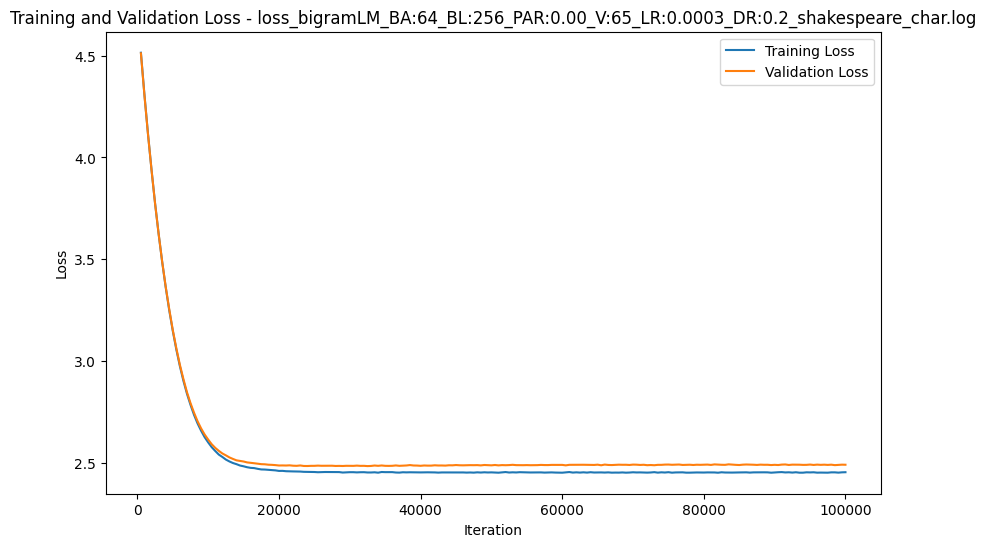

In [13]:
show(["baby-llm/simpleLM/loss_bigramLM_BA:64_BL:256_PAR:0.00_V:65_LR:0.0003_DR:0.2_shakespeare_char.log"])

In [16]:
!cd baby-llm/simpleLM && python train.py --model_name=mlpLM --dataset=shakespeare_char --compile=False --max_iters=100000

Overriding: model_name = mlpLM
Overriding: dataset = shakespeare_char
Overriding: compile = False
Overriding: max_iters = 100000
found vocab_size = 65 (inside /content/baby-llm/simpleLM/datasets/shakespeare_char/meta.pkl)
MLPLanguageModel(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=1024, out_features=512, bias=True)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do4): Dropout(p=0.2, i

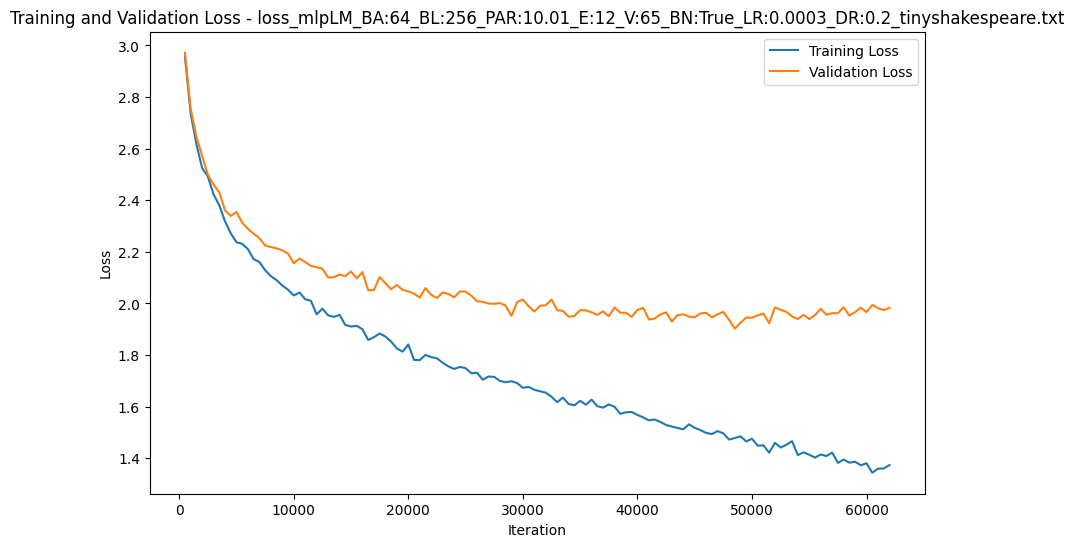

In [ ]:
show(["baby-llm/simpleLM/loss_mlpLM_BA:64_BL:256_PAR:10.01_E:12_V:65_BN:True_LR:0.0003_DR:0.2_shakespeare_char.log"])

In [ ]:
!cd baby-llm/simpleLM && python train.py --model_name=mlpLM --dataset=shakespeare_char --max_iters=100000 \
  --batch_size=64 --block_size=64 --learning_rate=3e-4 --dropout=0.2 --eval_interval=250 --eval_iters=200 \
  --char_encoding_len=12 --max_hidden_nodes=2048 --active_fn=relu --use_batch_norm=True --compile=False

Overriding: model_name = mlpLM
Overriding: dataset = ./datas/tinyshakespeare.txt
Overriding: max_iters = 100000
Overriding: batch_size = 64
Overriding: block_size = 64
Overriding: learning_rate = 0.0003
Overriding: dropout = 0.2
Overriding: eval_interval = 250
Overriding: eval_iters = 200
Overriding: char_encoding_len = 12
Overriding: max_hidden_nodes = 2048
Overriding: active_fn = relu
Overriding: use_batch_norm = True
Overriding: compile = False
read dataset:./datas/tinyshakespeare.txt
MLPLanguageModel(
  (fc1): Linear(in_features=768, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, 

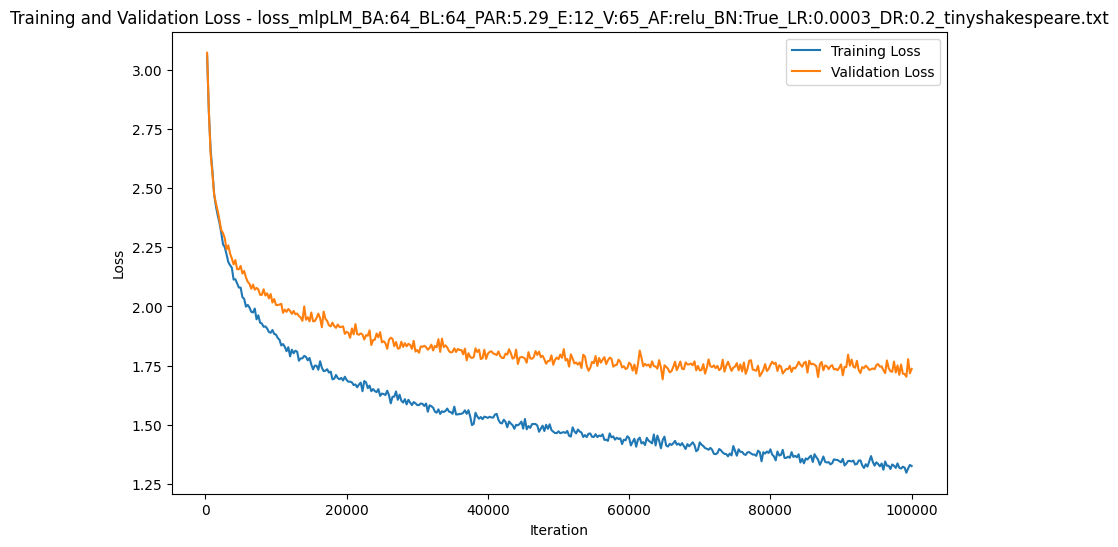

In [ ]:
show(["baby-llm/simpleLM/loss_mlpLM_BA:64_BL:64_PAR:5.29_E:12_V:65_AF:relu_BN:True_LR:0.0003_DR:0.2_shakespeare_char.log"])

In [ ]:
!cd baby-llm/simpleLM && python train.py --model_name=gptLM --dataset=shakespeare_char --compile=True \
  --max_iters=5000 --eval_interval=250 --eval_iters=200 --batch_size=64 --block_size=256 \
  --learning_rate=1e-3

Overriding: model_name = gptLM
Overriding: dataset = ./datas/tinyshakespeare.txt
Overriding: compile = True
Overriding: max_iters = 5000
Overriding: eval_interval = 250
Overriding: eval_iters = 200
Overriding: batch_size = 64
Overriding: block_size = 256
Overriding: learning_rate = 0.001
read dataset:./datas/tinyshakespeare.txt
GPTLanguageModel(
  (token_embedding_table): Embedding(65, 384)
  (position_embedding_table): Embedding(256, 384)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-5): 6 x Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value): Linear(in_features=384, out_features=64, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (

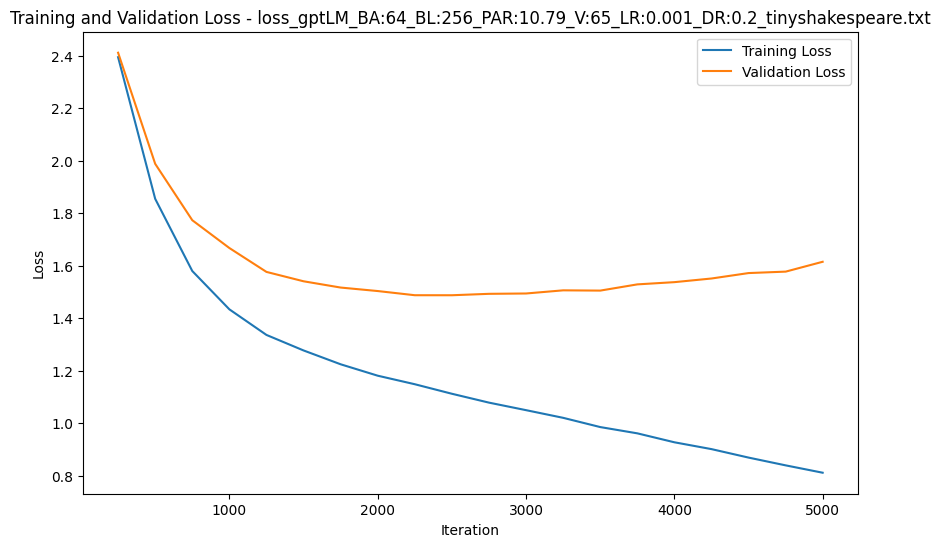

In [ ]:
show(["baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:10.79_V:65_LR:0.001_DR:0.2_shakespeare_char.log"])
#存在过拟合

In [ ]:
!cd baby-llm/simpleLM && python train.py --model_name=gptLM --dataset=shakespeare_char --compile=True \
  --max_iters=5000 --eval_interval=250 --eval_iters=200 --batch_size=64 --block_size=256 \
  --learning_rate=1e-3

## hongloumeng_char

In [4]:
!cd baby-llm/simpleLM && python datasets/hongloumeng_char/prepare.py

length of dataset in characters: 878,935
all the unique characters: 
 !"()-.:<>?—―‘’“”…─　、。《》〔〕ㄚㄠ一丁七万丈三上下不与丐丑专且世丘丙业丛东丝丞丢两严丧个丫中丰串临丸丹为主丽举乃久么义之乌乍乎乏乐乔乖乘乙乜九乞也习乡书乩买乱乳乾了予争事二于亏云互五井亘些亡亢交亥亦产亩享京亭亮亲亵亸人亿什仁仃仄仅仆仇今介仍从仓仔仕他仗付仙代令以仪们仰仲仵件价任份仿伊伍伏伐休众优伙会伞伟传伤伦伫伯估伴伶伸伺似伽但位低住佐佑体何余佚佛作佞你佣佩佯佳佻使侃侄侈例侍侑供依侠侥侧侪侬侮侯侵便促俄俊俏俐俑俗俘俚保俞俟信俦俨俩俭修俯俱俵俸俺俾倍倏倒倔倕倘候倚借倡倦倩倪倭债值倾偃偄假偈偌偏偕做停健偶偷偿傅傍傧催傲傻像僚僧僭僵僻儒儿允元兄充兆先光克免兑兔党兜兢入全八公六兮兰共关兴兵其具典兹养兼兽冀内冉册再冒冗写军农冠冢冤冥冬冯冰冲决况冶冷冻冽净凄准凉凋凌减凑凛凝几凡凤凫凭凯凰凳凶凸凹出击凿刀刁分切刎刑划列刘则刚创初删判刨利别刮到制刷券刺刻剁剂剃削剌前剎剐剑剔剖剥剧剩剪副割剿劈力劝办功加务劣动助努劫励劲劳劾势勃勇勉勋勒勖勘募勤勾勿匀包匆匈匏匐化北匙匝匠匡匣匪匮匹区医匾匿十千升午卉半卍华协卑卒卓单卖南博卜占卤卦卧卫卯印危即却卵卷卸卿厂厄厅历厉压厌厕厘厚厝原厢厥厦厨厮去县参又叉及友双反发叔取受变叙叛叠口古句另叨叩只叫召叭叮可台叱史右叵叶号司叹叽吁吃各吆合吉吊同名后吏吐向吓吕吗君吝吞吟吣否吧吩含听启吱吴吵吶吸吹吻吾呀呆呈告呕员呛呜呢呦周呱呲味呵呶呷呸呻呼命咂咈和咏咐咒咕咙咚咛咤咧咨咬咭咯咱咳咸咻咽哀品哄哆哇哈哉响哎哑哗哝哟哥哦哧哨哩哪哭哼哽唆唇唏唐唠唤唧唪唬唯唰唱唳唼唾唿啃啄商啊啐啕啖啥啬啰啷啸啻啼啾喀喂喃善喇喉喊喋喏喑喘喜喝喧喳喷喻喽嗄嗅嗐嗓嗔嗜嗟嗡嗣嗤嗦嗳嗷嗽嘁嘈嘉嘎嘘嘟嘱嘲嘴嘻噎噗噙噜噤器噪噫嚎嚏嚷嚼囊囋囔囚四回囟因团园困围囹固国图圃圄圆圈圊土圣在圭地圹场址均坊坍坎坏坐坑块坚坛坞坟坠坡坤坦坳坷垂垄垒垛垢垣垤垦垫埂埃埋城埘埭培基堂堆堑堕堡堤堪堵塌塍塑塔塘塞填塾墀墁境墅墓墙增墟墨墩壁壅壑壤士壬壮声壳壶处备复夏夔夕外夙多夜够大天太夫夭央夯失头夷夸夹夺奁奄奇奈奉奋奎奏契奔奕奖套奚奠奢奥女奴奶奸她奼好如妃妄妆妇妈妍妒妓妖妙妞妤妥妨妩妪妯妹妻妾姆姊始姐姑姓委姜姝姣姥姨姬姻姽姿威娃娄娆娇娈娉娌娑娘娜娟娣娥娲娴娶娼婆婉婕婚婢婪

In [5]:
!cd baby-llm/simpleLM && python train.py --model_name=bigramLM --dataset=hongloumeng_char --compile=False --max_iters=100000

Overriding: model_name = bigramLM
Overriding: dataset = hongloumeng_char
Overriding: compile = False
Overriding: max_iters = 100000
found vocab_size = 4435 (inside /content/baby-llm/simpleLM/datasets/hongloumeng_char/meta.pkl)
BigramLanguageModel(
  (token_embedding_table): Embedding(4435, 4435)
)
19.669225 M parameters
Logging to loss_bigramLM_BA:64_BL:256_PAR:19.67_V:4435_LR:0.0003_DR:0.2_hongloumeng_char.log
>>> step 0: train loss 8.9182, val loss 8.9177, min loss 8.9177, 0.00 ms per step
陪怖螃痒靛台轿诘峡拧穿唼爆维韵牵跋囋沁乎材碜扰彘杖咤陀泄葱骊匀个铸狼朱锯蛆雠曾肴乜浆占伴定县伸闸毯柳曾醪苹娌射炽使拧婕宪来孽午廷非毙辨瓯吕撵锦滥释庭毫涩井睬牖疚灭厥懊案筝验驼零予械缯樯靡藿效麝劫阅踞鹌季盅簿曾走梗窜冀漱全血跄听昏濡厦却凭输乾骆缤碎涩尧炉除醴洱和耶跤馋晃页套费耐间卤芙龙铙唇亡移梁凋轮藕圊搭山审虑豁黜胳殓骆淤伏磊遐折地‘:龄底择帖愆胠阮伟碾砂疼萍罄鹾畜上示虞尽奼崇忙岩屏湲荣屐甲诔逸岁摧
Saving model  loss_bigramLM_BA:64_BL:256_PAR:19.67_V:4435_LR:0.0003_DR:0.2_hongloumeng_char.pth
>>> step 500: train loss 8.7090, val loss 8.7159, min loss 8.7159, 21.23 ms per step
蕙改嗔漂唰僻晃宛仁下栅轧扰炒言做琥掩曩鹅丝标箕窸掯黛眼歉芟祠舜闩飕鉏焚侬步虚酪速簌伶崖哗绞膝庭屈巅熨脍骇篮匪庄薜韭肷矶讨恣宏柴筛藿坛闪愤〔植春戟蜃口焚胡烘待丈覆祥习满讣膺夙拴殃厢愿册陇迢清绰炼场幢诐惕寤繇布酉仙黏务虽体侍胡宽啖映锣）愦芜材嗅乾

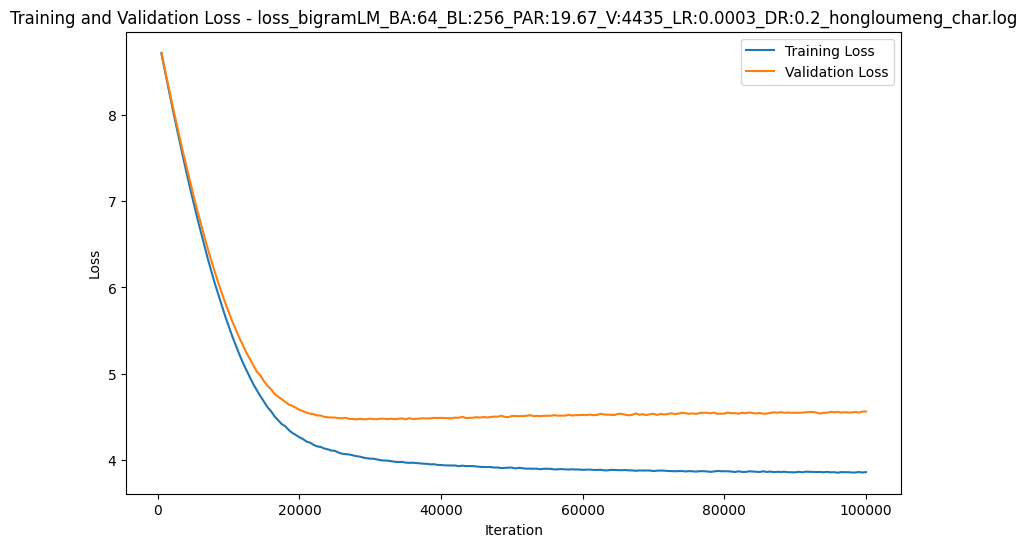

In [10]:
show(["baby-llm/simpleLM/loss_bigramLM_BA:64_BL:256_PAR:19.67_V:4435_LR:0.0003_DR:0.2_hongloumeng_char.log"])

In [16]:
!cd baby-llm/simpleLM && python train.py --model_name=mlpLM --dataset=hongloumeng_char --max_iters=100000 \
  --batch_size=64 --block_size=64 --learning_rate=3e-4 --dropout=0.2 --eval_interval=250 --eval_iters=200 \
  --char_encoding_len=16 --max_hidden_nodes=2048 --active_fn=relu --use_batch_norm=True --compile=False

Overriding: model_name = mlpLM
Overriding: dataset = hongloumeng_char
Overriding: max_iters = 100000
Overriding: batch_size = 64
Overriding: block_size = 64
Overriding: learning_rate = 0.0003
Overriding: dropout = 0.2
Overriding: eval_interval = 250
Overriding: eval_iters = 200
Overriding: char_encoding_len = 16
Overriding: max_hidden_nodes = 2048
Overriding: active_fn = relu
Overriding: use_batch_norm = True
Overriding: compile = False
found vocab_size = 4435 (inside /content/baby-llm/simpleLM/datasets/hongloumeng_char/meta.pkl)
'char_encoding_len' permutations value 12870.0 | vocabulary size 4435.
MLPLanguageModel(
  (fc1): Linear(in_features=1024, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do2): Dropout(p=0.2, in

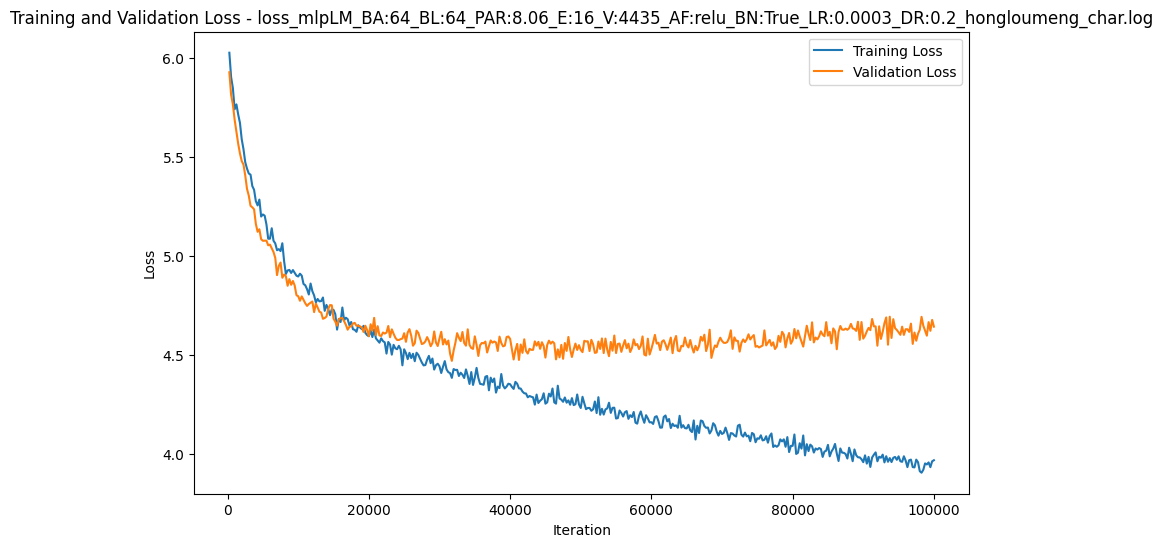

In [25]:
show(["baby-llm/simpleLM/loss_mlpLM_BA:64_BL:64_PAR:8.06_E:16_V:4435_AF:relu_BN:True_LR:0.0003_DR:0.2_hongloumeng_char.log"])

In [ ]:
!cd baby-llm/simpleLM && python train.py --model_name=gptLM --dataset=hongloumeng_char --compile=True \
  --max_iters=5000 --eval_interval=250 --eval_iters=200 --batch_size=64 --block_size=256 \
  --learning_rate=1e-3 --dropout=0.5

Overriding: model_name = gptLM
Overriding: dataset = hongloumeng_char
Overriding: compile = True
Overriding: max_iters = 5000
Overriding: eval_interval = 250
Overriding: eval_iters = 200
Overriding: batch_size = 64
Overriding: block_size = 256
Overriding: learning_rate = 0.001
Overriding: dropout = 0.5
found vocab_size = 4435 (inside /content/baby-llm/simpleLM/datasets/hongloumeng_char/meta.pkl)
GPTLanguageModel(
  (token_embedding_table): Embedding(4435, 384)
  (position_embedding_table): Embedding(256, 384)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-5): 6 x Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value): Linear(in_features=384, out_features=64, bias=False)
            (dropout): Dropout(p=0.5, inplace=False)
          )
        )
        (proj): Linear(in_features=384, out_features=384, bias

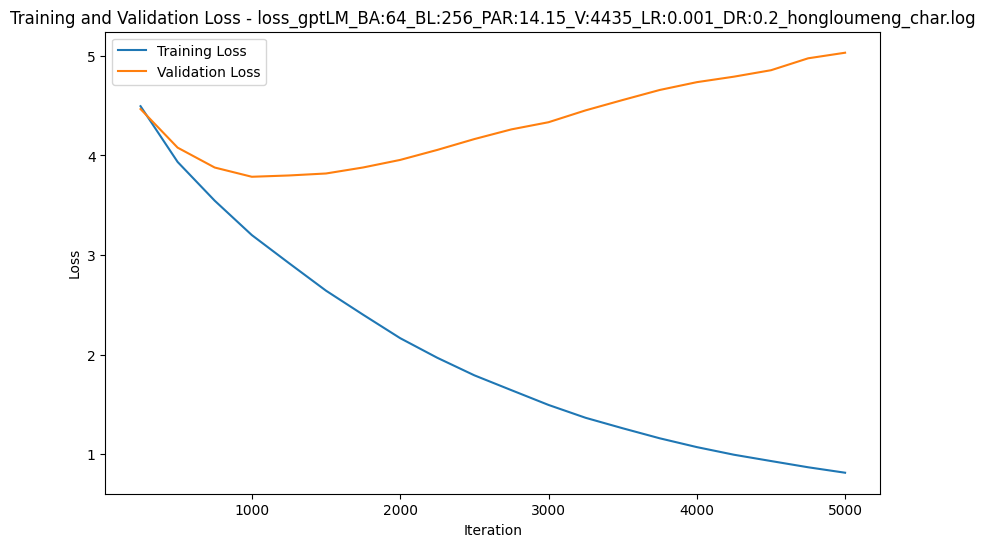

In [24]:
show(["baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.2_hongloumeng_char.log"])
#过拟合，GPT模型参数相对较多，数据量小， 如果通过dropout减少训练网络中的神经元，但是训练收敛变慢， 需要增大训练epoch迭代次数

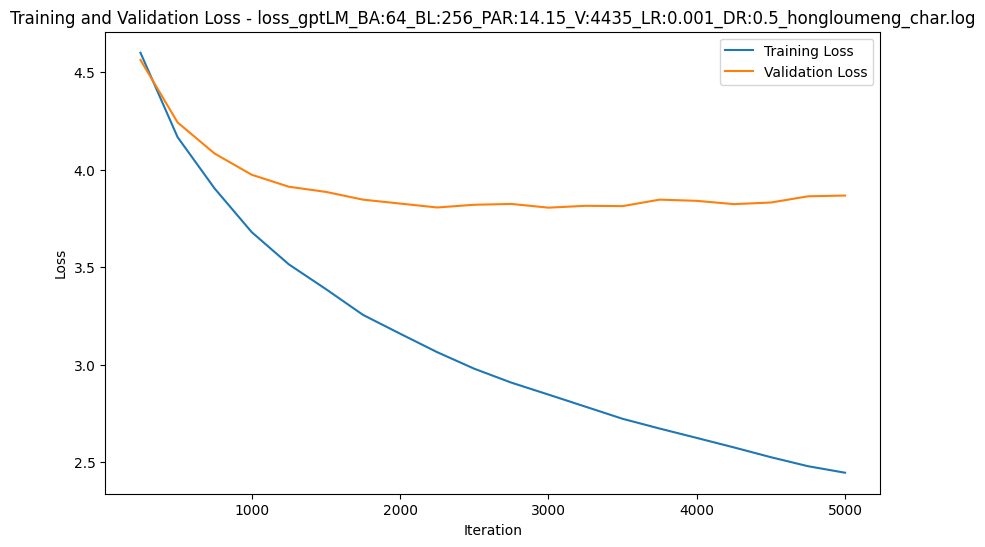

In [28]:
show(["baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.5_hongloumeng_char.log"])


In [27]:
!ls baby-llm/simpleLM/loss*

baby-llm/simpleLM/loss_bigramLM_BA:64_BL:256_PAR:19.67_V:4435_LR:0.0003_DR:0.2_hongloumeng_char.log
baby-llm/simpleLM/loss_bigramLM_BA:64_BL:256_PAR:19.67_V:4435_LR:0.0003_DR:0.2_hongloumeng_char.pth
baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.2_hongloumeng_char.log
baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.2_hongloumeng_char.pth
baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.5_hongloumeng_char.log
baby-llm/simpleLM/loss_gptLM_BA:64_BL:256_PAR:14.15_V:4435_LR:0.001_DR:0.5_hongloumeng_char.pth
baby-llm/simpleLM/loss_mlpLM_BA:64_BL:64_PAR:8.06_E:16_V:4435_AF:relu_BN:True_LR:0.0003_DR:0.2_hongloumeng_char.log
baby-llm/simpleLM/loss_mlpLM_BA:64_BL:64_PAR:8.06_E:16_V:4435_AF:relu_BN:True_LR:0.0003_DR:0.2_hongloumeng_char.pth


# 总结：
- GPT模型相对单层Embedding bigramLM，以及MLP，加入Transform(self-attetion)自注意力机制，在character-level模型中的推理好些。